In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print('GPU name: ', tf.config.experimental.list_physical_devices('GPU'))

print('Tensorflow version: ',tf.__version__)
print('Keras version: ',tf.keras.__version__,end='\n\n')

Num GPUs Available:  1
GPU name:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Tensorflow version:  2.8.0
Keras version:  2.8.0



In [2]:
model = tf.keras.models.load_model('iFood6_CNN_Model_Adadelta_2000_20')
print(model.summary())

Model: "iFood6_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv2D)              (None, 176, 176, 64)      4864      
                                                                 
 MPool1 (MaxPooling2D)       (None, 58, 58, 64)        0         
                                                                 
 Conv2 (Conv2D)              (None, 54, 54, 64)        102464    
                                                                 
 MPool2 (MaxPooling2D)       (None, 18, 18, 64)        0         
                                                                 
 Conv3 (Conv2D)              (None, 16, 16, 32)        18464     
                                                                 
 MPool3 (MaxPooling2D)       (None, 8, 8, 32)          0         
                                                                 
 Conv4 (Conv2D)              (None, 6, 6, 32)          9

In [5]:
imgHeight = 180
imgWidth = 180

dir = os.getcwd()
testPath = dir+'\\Data6Classes\\test'
print(testPath)

X_test = tf.keras.utils.image_dataset_from_directory(testPath,labels='inferred',label_mode='int',\
	color_mode='rgb',seed=15,image_size=(imgHeight,imgWidth))

class_names = X_test.class_names
class_number = len(X_test.class_names)
print(f"Classes: {class_names}")
print(f"Number of classes: {class_number}")

results = model.evaluate(X_test)
print(results)

c:\Users\Rasmus\Github\SWMAL_15_O4\Data6Classes\test
Found 277 files belonging to 6 classes.
Classes: ['brisket_126', 'edamame_76', 'hamburger_164', 'lobster_food_91', 'omelette_196', 'pizza_183']
Number of classes: 6
9/9 [==============================] - 0s 21ms/step - loss: 1.5162 - accuracy: 0.6931
[1.5162372589111328, 0.6931408047676086]


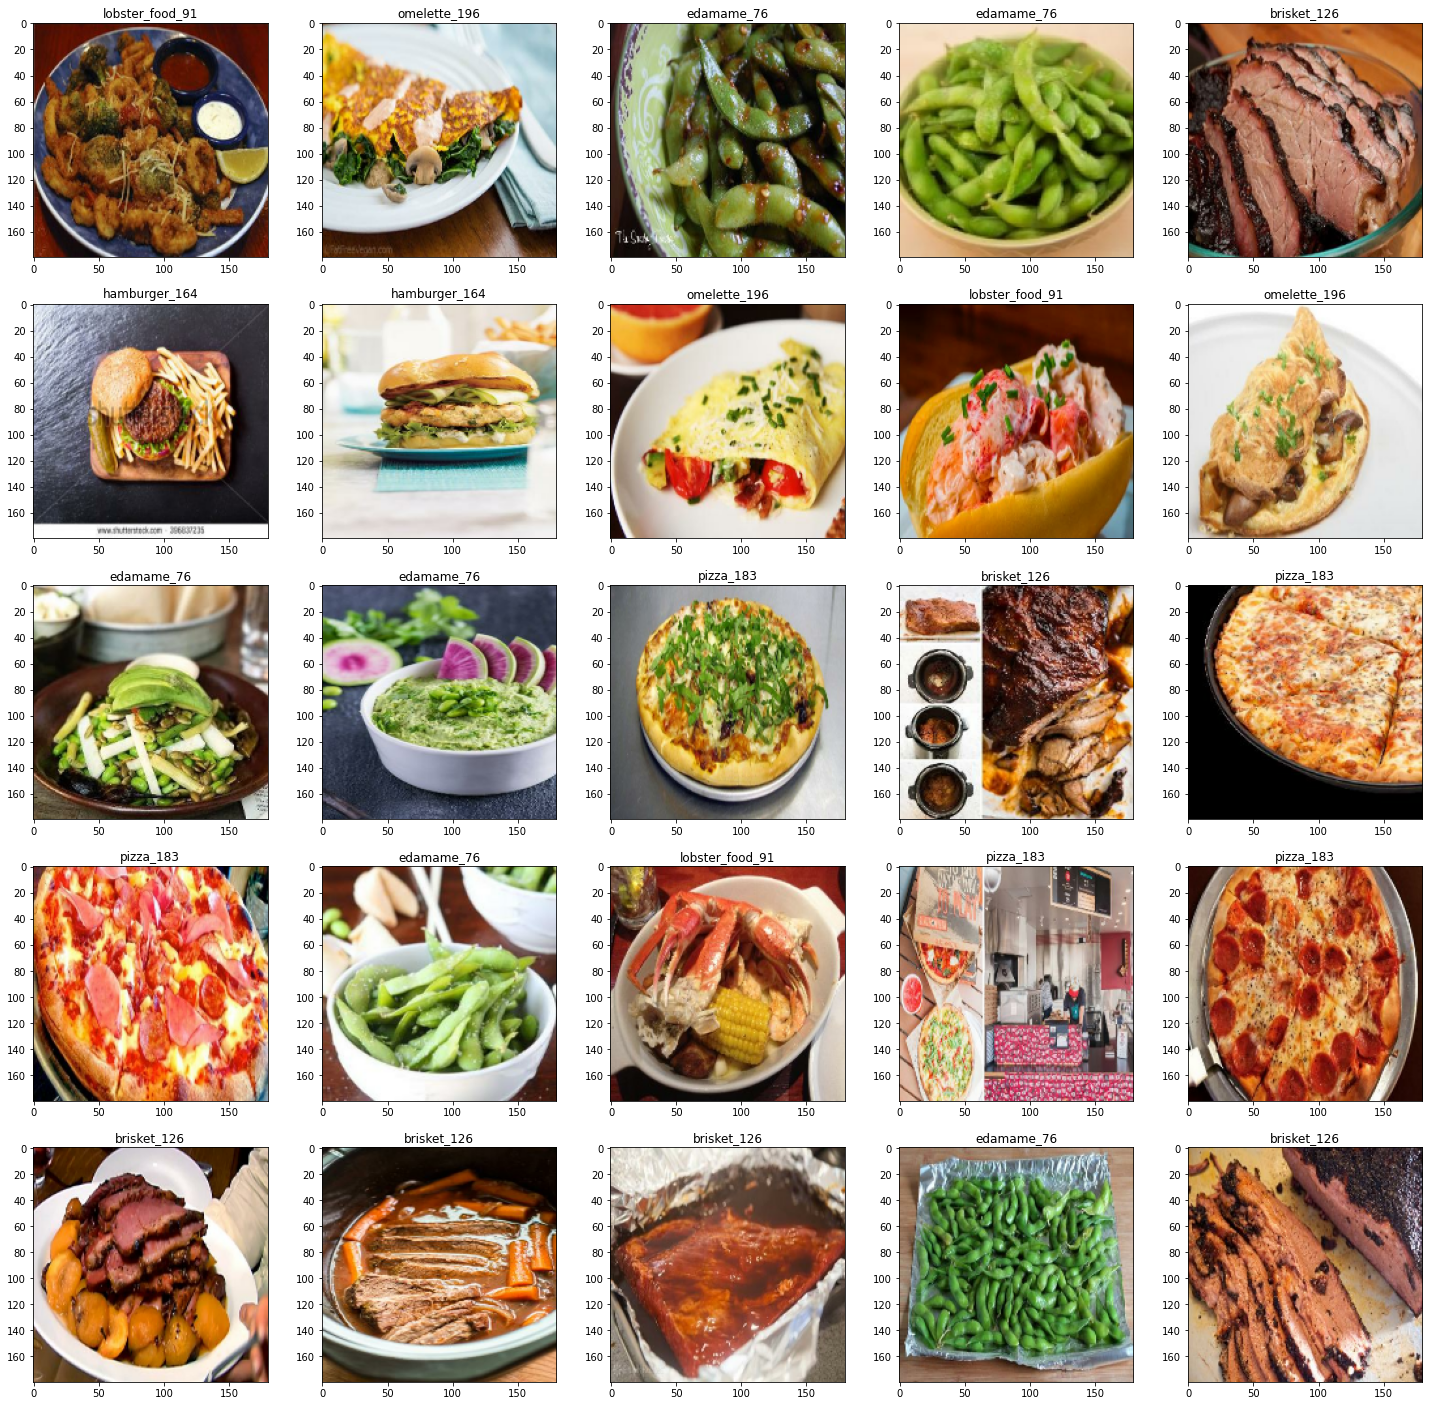

In [7]:
predictions = model.predict(X_test)
image_batch, labels_batch = next(iter(X_test))

plt.figure(figsize=(25, 25))
for i in range(25):
	plt.subplot(5, 5, i + 1)
	plt.imshow(image_batch[i].numpy().astype('uint8'))
	plt.title(class_names[labels_batch[i]])
plt.show()